<h1>0. Import Libraries</h1>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.6.1


<h1>1. Import Fashion MNIST</h1>

<h3>Fashion MNIST</h3>

- 10개의 범주(카테고리)와 70,000개의 흑백이미지로 구성된 데이터셋
- 이미지는 해상도(28x28 픽셀)가 낮고 개별 옷 품목을 나타낸다.
- 해당 데이터셋은 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용된다. 코드를 테스트하고 디버깅하는 용도로 좋다.
- 60,000개의 이미지를 사용하여 네트워크를 훈련하고 10,000개의 이미지를 사용하여 네트워크에서 이미지 분류를 학습한 정도를 평가한다.
- TensorFlow에서 직접 Fashion MNIST에 엑세스할 수 있다.

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

- load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환된다.
- train_images와 train_labels 배열은 모델 학습에 사용되는 훈련 세트
- test_images와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트
- 각 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0~255 사이이다.
- 레이블은 0에서 9까지의 정수 배열이다. 이 값은 이미지에 있는 옷의 클래스(class)를 나타낸다.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

- 각 이미지는 하나의 레이블에 매핑되어있다. 
- 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.
- class_names 라는 리스트 타입의 변수를 선언 해 범주명을 저장 해 준다.

<h1>2. Data Exploration</h1>

- 모델을 훈련하기 전 데이터셋 구조를 살펴보자.

In [8]:
train_images.shape

(60000, 28, 28)

In [13]:
type(train_images)

numpy.ndarray

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

<h1>3. Data Preprocessing

- 네트워크를 훈련하기 전에 데이터를 전처리해야 한다.
- 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있다.

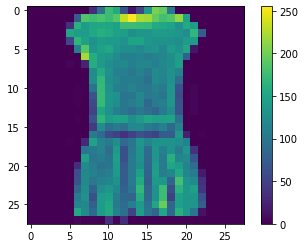

In [21]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

- 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하자. 이렇게 하려면 255로 나누어야한다.
- 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요하다.

In [22]:
train_images = train_images / 255.0
test_images = test_images / 255.0

- 훈련세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력 해 보자.
- 데이터 포맷이 올바른지 확인하고 네트워크 구성과 |훈련할 준비를 마친다.

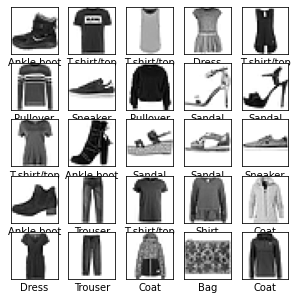

In [26]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

<h1>4. Model Configuring

- 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일한다.
- 신경망의 기본 빌딩 블록은 레이어이다. 레이어는 레이어에 공급된 데이터로부터 표현을 추출한다. 
- 대부분 딥러닝은 간단한 층을 연결하여 구성된다. tf.keras.layers.Dense 와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습된다.

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

- 이 네트워크의 첫 번째 층인 tf.keras.layers.Flatten 은 2차원 배열(28x28픽셀)의 이미지 포맷을 28x28=784 픽셀의 1차원 배열로 변환한다.
- 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘린다.
- 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 한다.

<br>

- 픽셀을 펼친 후에는 두 개의 tf.keras.layers.Dense 층이 연속되어 연결된다.
- 첫 번째 Dense 층은 128개의 노드(또는 뉴런)을 가진다.
- 두 번째 (마지막) 층은 10개의 노드의 소프트맥스(softmax) 층이다.
- 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1이다.
- 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력한다.

<h1>5. Model Compile</h1>

- 모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요하다. 다음은 모델의 컴파일 단계에서 추가된다.

1. 손실함수 : 훈련 중 모델이 얼마나 정확한지 측정한다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화 해야 한다.
2. 옵티마이저 : 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트 되는 방식이다.
3. 메트릭 : 훈련 및 테스트 단계를 모니터링하는 데 사용된다. 다음 예에서 올바르게 분류된 이미지의 비율인 정확도를 사용한다.

In [31]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

<h1>6. Train the Model</h1>

- 신경망 모델을 훈련하려면 다음 단계가 필요하다.

1. 훈련 데이터를 모델에 주입한다. 이 예에서는 train_images와 train_labels 배열이다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배운다.
3. 테스트 세트에 대한 모델의 예측을 만든다. 이 예에서는 test_images 배열이다. 이 에측이 test_labels 배열의 레이블과 맞는지 확인한다.
4. 예측이 test_labels 배열의 레이블과 일치하는지 확인한다.

- 훈련을 시작하려면 model.fit 메서드를 호출한다. 모델을 훈련 데이터에 "맞추기(fit)" 때문에 이렇게 불린다.

In [32]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4969 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3707 - accuracy: 0.8668: 0s - los
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3361 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3117 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2937 - accuracy: 0.8919: 0s - loss: 0.292
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2803 - accuracy: 0.8954: 0s - l
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2684 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2566 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2457 - accuracy: 0.9077
Epoch 10/10
1875/1875 [=======================

- 모델이 훈련되면서 손실과 정확도 지표가 출력된다. 
- 이 모델은 훈련 세트에서 약 0.88(88%) 정도의 정확도를 달성한다.

<h1>7. Evaluate Accuracy</h1>

- 모델이 테스트 데이터세트에서 작동하는 방식을 비교한다.

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy : ", test_acc)

313/313 - 1s - loss: 0.3406 - accuracy: 0.8833

Test accuracy :  0.8833000063896179


- 테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮다.
- 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 떄문이다.
- 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말한다.

<h1>8. Inference</h1>

- 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있다.
- 모델의 선형 출력, logits.softmax layer를 연결하여 logit을 해석하기 쉬운 확률로 변환한다.

In [37]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [38]:
predictions = probability_model.predict(test_images)

- 여기서는 테스트 세트에 있는 각 이미지의 레이블을 예측했다. 첫 번째 예측을 확인 해 보자.

In [39]:
predictions[0]

array([1.7927781e-07, 7.9835559e-08, 6.9216986e-11, 1.0113613e-10,
       2.2498678e-09, 1.6598193e-03, 2.2187809e-08, 1.1290974e-03,
       1.6171358e-08, 9.9721080e-01], dtype=float32)

- 이 예측은 10개의 숫자 배열로 나타난다.
- 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타낸다.
- 가장 높은 신뢰도를 가진 레이블을 찾아보자.

In [41]:
np.argmax(predictions[0])

9

- 모델은 이 이미지가 앵클 부츠(class_name[9])라고 가장 확신하고 있다. 
- 이 값이 맞는지 테스트 레이블을 확인 해 보자.

In [42]:
test_labels[0]

9

- 10개 클래스에 대한 예측을 모두 그래프로 표현 해 보자.

In [43]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

In [44]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

<h1>9. Check Inference</h1>

- 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있다.
- 0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인 해 보자.

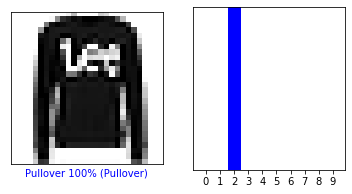

In [46]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

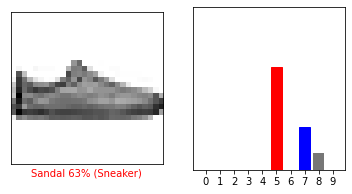

In [47]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

- 몇 개의 이미지의 예측을 출력 해 보자.
- 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨간색이다.
- 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)이다.
- 신뢰도 점수가 높을 때도 잘못 예측할 수 있다.

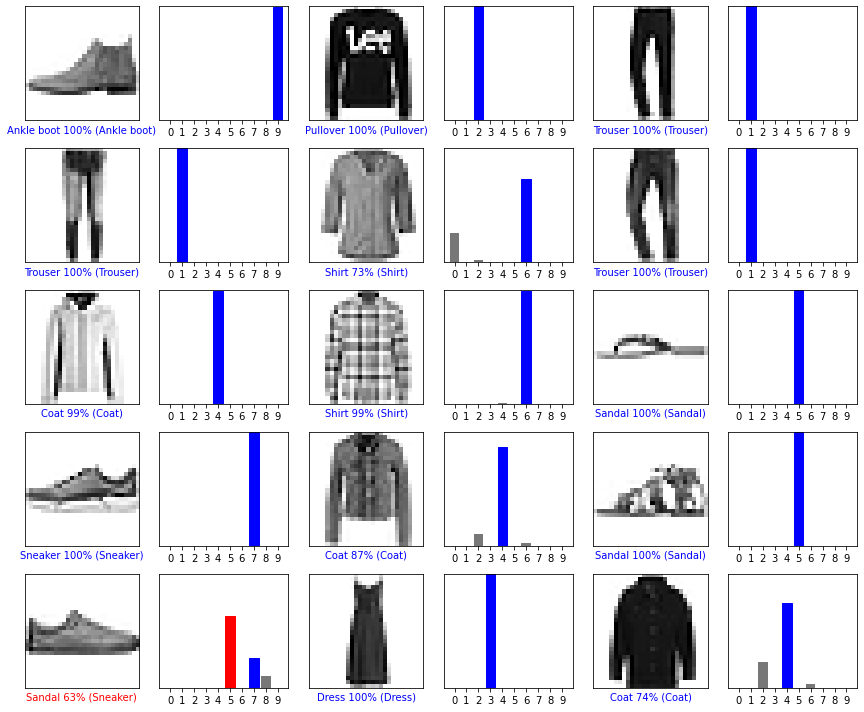

In [48]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

<h1>10. Use the trained model

- 마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만든다.

In [50]:
# Grab an image from the test dataset.

img = test_images[1]

print(img.shape)

(28, 28)


- tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있다.
- 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야한다.

In [52]:
# Add the image to a batch where it`s the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 28, 28)


- 이제 이 이미지의 예측을 만든다. : 

In [54]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[3.7742906e-05 1.2018536e-13 9.9940252e-01 4.6323542e-11 5.1431905e-04
  6.4198014e-16 4.5444776e-05 3.8790744e-21 1.7075080e-12 3.3983301e-13]]


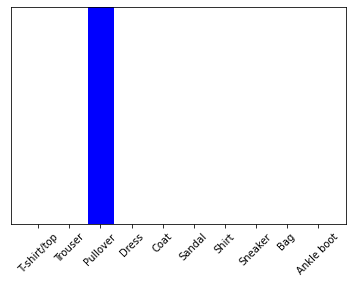

In [55]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [56]:
np.argmax(predictions_single[0])

2

- 모델이 레이블을 예측함을 알 수 있다.